In [ ]:
#pull all 12 months data
#using FordGO from the SF Bay area and includes 5 cities

In [1]:
import zipfile, urllib.request, shutil
import pandas as pd
import numpy as np
import glob
import citipy
import csv
import os
import openweathermapy
from uszipcode import Zipcode
import matplotlib.pyplot as plt


In [2]:
#id the folder that has all the zip files
#create a glob for the path and file names
#create a empty list for holding everything 
path = r'C:\Users\Gogster\Documents\GitHub\RawData'
#path=r'../RawData'
allfiles=glob.glob(path+"/*.zip")

data_list=[]


In [ ]:
# zip_list=[201801-fordgobike-tripdata.csv.zip,
#           201802-fordgobike-tripdata.csv.zip,
#           201803-fordgobike-tripdata.csv.zip,
#           201804-fordgobike-tripdata.csv.zip,
#          201805-fordgobike-tripdata.csv.zip,
#          201806-fordgobike-tripdata.csv.zip,
#          201807-fordgobike-tripdata.csv.zip,
#          201808-fordgobike-tripdata.csv.zip,
#          201809-fordgobike-tripdata.csv.zip,
#          2018010-fordgobike-tripdata.csv.zip,
#          2018011-fordgobike-tripdata.csv.zip,
#          2018012-fordgobike-tripdata.csv.zip]

In [3]:
#list comprehend through the folder with all the zip files
#append to the dataframe merging all the months

for z_file in allfiles:
    df=pd.read_csv(z_file, compression='zip',header=0,sep=',',quotechar='"')
    data_list.append(df)

all_frame=pd.concat(data_list,axis=0,ignore_index=True)    

In [ ]:
all_frame.head()

In [ ]:
all_frame.shape
#this is all the rows 1.863721M by 16

In [4]:
#create 2 new rows 1 for the zip code and one for the city name
#city 
all_frame.insert(loc=7, column='city', value='abc')
#zip codes
all_frame.insert(loc=8, column='zip_code', value='123456')
#age in years of users
all_frame.insert(loc=16, column='age', value ='99')

In [ ]:
#display new table
all_frame.head()

In [5]:
#remove rows which have Nan values
drop_frame= all_frame.dropna(axis=0,how='any',inplace=False)
#delete extra columns in the data that are not relavent
drop_frame.drop(['bike_share_for_all_trip'],axis = 1, inplace = True)
#display the dataframe
#drop_frame.head()

C:\Users\Gogster\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
drop_frame.shape
# 1.741556 M and 18 col WAS

In [6]:
clean_df=pd.DataFrame(drop_frame)

In [7]:
#find age of user by subtracting birth year from current year
thisyear=2019
clean_df['age'] = thisyear - clean_df['member_birth_year']
clean_df['age'] = clean_df['age'].astype(int)
clean_df['member_birth_year'] = clean_df['member_birth_year'].astype(int)
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,33,Male
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,23,Male
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,28,Male
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,123456,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,31,Male
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,123456,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,39,Male


In [8]:
max_age = 65
# under65_df = drop_frame.loc[:, (drop_frame.isnull().sum(axis=0) <= max_age)]
# under65_df.shape
#did not work


#Use this DF for all work- It holds all the users aged 19 to 65
max_age_df = (clean_df[clean_df['age']<(max_age)])
max_age_df.shape
#1.71882M records

(1718882, 18)

In [34]:
clean_df=pd.DataFrame(max_age_df)
clean_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,abc,123456,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,33,Male
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,abc,123456,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,23,Male
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,abc,123456,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,28,Male
6,453,2018-01-31 23:53:53.6320,2018-02-01 00:01:26.8050,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,abc,123456,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,31,Male
7,180,2018-01-31 23:52:09.9030,2018-01-31 23:55:10.8070,81.0,Berry St at 4th St,37.775880,-122.393170,abc,123456,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,39,Male


In [ ]:
#clean_df.to_csv("clean_bike_data.csv")

In [ ]:
#interate through the df and pull out the lat/lng to plug into function search.by_coordinates

In [ ]:
#zip code vs number of stations

In [10]:
#which users are consumers vs subscribers (user_type=Subscriber)
s_grp_cnt= clean_df.groupby('user_type').size()
print (s_grp_cnt)
# 1.718882M and 18 col

user_type
Customer       197916
Subscriber    1520966
dtype: int64


In [11]:
#group by the sex of the users
# the cnt is correct here
m_grp_cnt= clean_df.groupby('member_gender').size()
print (m_grp_cnt)

member_gender
Female     431825
Male      1260551
Other       26506
dtype: int64


In [25]:
# NOT NEEDED
#gender_cnt_df=pd.DataFrame(m_grp_cnt)
# gender_cnt_df.head()

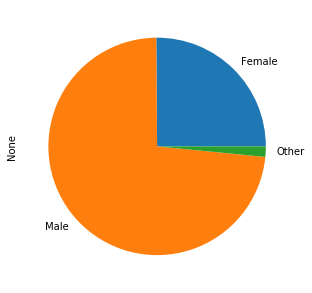

In [23]:
# insert pie graph of gender percentages

plot = m_grp_cnt.plot.pie(y='member_gender',figsize=(5,5))
plt.show()

In [41]:
# drop_frame.query(float('member_birth_year') > float('1989.0') and user_type == 'Subsciber').groupby('Sex').count()
#calc the number of customers and subscribers by gender
#WRONG COUNT
cus_df = clean_df.groupby(['user_type','member_gender']).size()
# cus_df.head(10)
cus_df


user_type   member_gender
Customer    Female             62858
            Male              131089
            Other               3969
Subscriber  Female            368967
            Male             1129462
            Other              22537
dtype: int64

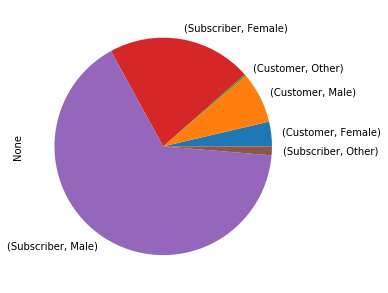

In [42]:
plot = cus_df.plot.pie(y='member_gender',figsize=(5,5))
plt.show()

In [45]:
cus_age_df = clean_df.groupby(['user_type','member_gender','age']).size()
# cus_df.head(10)
cus_age_df

user_type   member_gender  age
Customer    Female         19      481
                           20     1323
                           21     1293
                           22     1581
                           23     2037
                           24     2612
                           25     2991
                           26     3169
                           27     3610
                           28     3217
                           29     3673
                           30     3790
                           31     5158
                           32     3178
                           33     2966
                           34     2307
                           35     2029
                           36     2205
                           37     1528
                           38     1374
                           39     1255
                           40     1219
                           41      862
                           42      759
                           43    

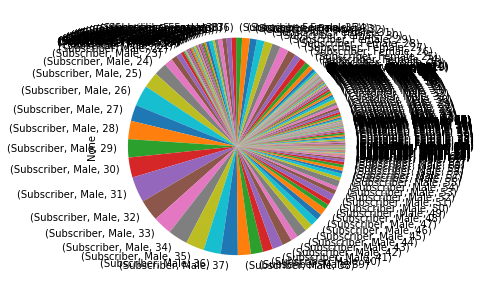

In [49]:
plot = cus_age_df.plot.pie(y='member_gender',figsize=(5,5))
plt.show()
#need to bin this

In [24]:
other_df= clean_df.loc[clean_df['member_gender']=='Other']
other_df.head()
# other_df.shape

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,city,zip_code,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,age,member_gender
235,2057,2018-01-31 20:21:46.4380,2018-01-31 20:56:04.0060,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,abc,123456,243.0,Bancroft Way at College Ave,37.869360,-122.254337,272,Subscriber,1997,22,Other
242,735,2018-01-31 20:41:04.1420,2018-01-31 20:53:19.6450,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,abc,123456,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1659,Subscriber,1983,36,Other
255,1261,2018-01-31 20:28:01.1690,2018-01-31 20:49:03.0620,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,abc,123456,196.0,Grand Ave at Perkins St,37.808894,-122.256460,1036,Customer,1987,32,Other
396,387,2018-01-31 20:00:54.0730,2018-01-31 20:07:21.5560,19.0,Post St at Kearny St,37.788975,-122.403452,abc,123456,321.0,5th at Folsom,37.780146,-122.403071,2688,Subscriber,1979,40,Other
460,495,2018-01-31 19:42:17.9960,2018-01-31 19:50:33.1630,223.0,16th St Mission BART Station 2,37.764765,-122.420091,abc,123456,119.0,18th St at Noe St,37.761047,-122.432642,3457,Subscriber,1988,31,Other


In [ ]:
other_df.shape

In [27]:
male_df= clean_df.loc[clean_df['member_gender']=='Male']
male_df.head()
male_df.shape

(1260551, 18)

In [28]:
female_df= clean_df.loc[clean_df['member_gender']=='Female']
female_df.head()
female_df.shape

(431825, 18)

In [29]:
sub_df= clean_df.loc[clean_df['user_type']=='Subscriber']
#sub_df.head()

In [43]:
sub_df.shape
# sub_df.head()
#subscibers only df is 1.520966M by 18

(1520966, 18)

In [38]:
sub_df['member_gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [31]:
m_sub_df= sub_df.loc[clean_df['member_gender']=='Male']
m_sub_df.shape
#1129462 by 18

(1129462, 18)

In [32]:
f_sub_df= sub_df.loc[clean_df['member_gender']=='Female']
f_sub_df.shape
#368967 by 18

(368967, 18)

In [44]:
o_sub_df= sub_df.loc[clean_df['member_gender']=='Other']
o_sub_df.shape
#o_sub_df.head()

#cnt is 22537 by 18

(22537, 18)

In [ ]:
clean_df['age'].describe()


In [ ]:
low_df = clean_df[(clean_df['age']<20)]
low_df.shape

In [ ]:
o_low_df= low_df.loc[clean_df['member_gender']=='Other']
o_low_df.shape

In [ ]:
m_low_df= low_df.loc[clean_df['member_gender']=='Male']
m_low_df.shape

In [ ]:
f_low_df= low_df.loc[clean_df['member_gender']=='Female']
f_low_df.shape

In [ ]:
und23_df = clean_df[(clean_df['age']<23)]
und23_df.shape

In [ ]:
o_u23_df= und23_df.loc[clean_df['member_gender']=='Other']
o_u23_df.shape

In [ ]:
m_u23_df= und23_df.loc[clean_df['member_gender']=='Male']
m_u23_df.shape

In [ ]:
f_u23_df= und23_df.loc[clean_df['member_gender']=='Female']
f_u23_df.shape

In [ ]:
# # grp all that are under age 37, the millenial? 23 to 37
# age_df= clean_df.loc[clean_df['age']>'23'and ['age']<'37' ]
# age_df.shape

# bins = [20, 25, 30, 35, 37, 40, 45]
# names = ['<20', '20-24','25-29', '30-35', '36 and 37','37-40', '40-44','>45' ]

#fig out millenials 23 to 37
# under23_df= sub_df.loc[clean_df['age'] <'23']
# under23_dfshape

# df[(df[col]>22) & (df[col]<38]

early_mil_df = clean_df[(clean_df['age']>22) & (clean_df['age']<30)]
early_mil_df.shape
#mil_df.head()

In [ ]:
o_early_mil_df= early_mil_df.loc[clean_df['member_gender']=='Other']
o_early_mil_df.shape

In [ ]:
m_early_mil_df= early_mil_df.loc[clean_df['member_gender']=='Male']
m_early_mil_df.shape

In [ ]:
f_early_mil_df= early_mil_df.loc[clean_df['member_gender']=='Female']
f_early_mil_df.shape

In [ ]:
late_mil_df = clean_df[(clean_df['age']>29) & (clean_df['age']<38)]
late_mil_df.shape

In [ ]:
o_late_mil_df= late_mil_df.loc[clean_df['member_gender']=='Other']
o_late_mil_df.shape

In [ ]:
m_late_mil_df= late_mil_df.loc[clean_df['member_gender']=='Male']
m_late_mil_df.shape

In [ ]:
f_late_mil_df= late_mil_df.loc[clean_df['member_gender']=='Female']
f_late_mil_df.shape

In [ ]:
to41_df= clean_df[(clean_df['age']>37) & (clean_df['age']<42)]
to41_df.shape

In [ ]:
o_to41_df= to41_df.loc[clean_df['member_gender']=='Other']
o_to41_df.shape

In [ ]:
m_to41_df= to41_df.loc[clean_df['member_gender']=='Male']
m_to41_df.shape

In [ ]:
f_to41_df= to41_df.loc[clean_df['member_gender']=='Female']
f_to41_df.shape

In [ ]:
ove41_df = clean_df[(clean_df['age']>65)]
ove41_df.shape

In [ ]:
o_ove41_df= ove41_df.loc[clean_df['member_gender']=='Other']
o_ove41_df.shape

In [ ]:
m_ove41_df= ove41_df.loc[clean_df['member_gender']=='Male']
m_ove41_df.shape

In [ ]:
f_ove41_df= ove41_df.loc[clean_df['member_gender']=='Female']
f_ove41_df.shape

In [ ]:
# Find zipcodes using latitude and longitude coordinates

# Use sample coordinates and set "returns" to 1 to print out the result to determine the location of the zipcode value in the list
# The list returned by search.by_coordinates() does not allow strings to be used to select values due to SimpleZipcode()
coordinates_sample = search.by_coordinates(39.122229, -77.133578, radius=5, returns=1)
print(coordinates_sample)

In [ ]:
# Create an empty list to append the coordinate values to
coordinates_list = []

# Zip the columns "start_station_latitude" and "start_station_longitude" to return an iterator of tuples
# Loop through each value in the columns using lat, lng
for lat, lng  in zip(df['start_station_latitude'], df['start_station_longitude']):
    print(lat, lng)
    # Find the lng, lat paired coordinates using search.by_coordinates() from the uszipcode dependency
    # Set returns to 0 to return all of the coordinates in the lat,lng columns
    # Set the radius to 100 to make sure to cover all of the zipcodes included in our database
    coordinates = search.by_coordinates(lat=lat, lng=lng, radius=100, returns=0)
    # Append the lat,lng coordinates to coordinates_list
    coordinates_list.append(coordinates)

In [ ]:
# Use a list comprehension to unpack the rest of the values in "result" so you can choose the zipcodes to add to the dataframe
zipcode = [coordinates_list[i][0].items()[0][1] for i, x in enumerate(coordinates_list)]

# Assign the zipcode values to the zip_code column in the dataframe
df['zip_code'] = zipcode
# Preview the first 5 rows of the updated dataframe to confirm that the changes were made properly
df.head()

In [ ]:
# Calculate number of stations in each zip code

# Create a new dataframe with the columns zip_code, start_station_id, and end_station_id. This will be used to calculate the
# number of stations in each zip code
station_count_df = df[['zip_code', 'start_station_id', 'end_station_id']]
# Display the first few rows to confirm that the dataframe was created properly
station_count_df.head()

In [ ]:
# Set a variable, unique_count, to a groupby() object as a base for calculating the number of stations in each zip code
# Pass the zip_code column into groupby to count the number of stations grouped by each unique zip code
# Use .size() to return the total number of elements
# Use .reset_index() to recalculate the index for each row based upon their position within the new DataFrame. This will
 # enable simpler referencing of rows in the future
# Pass the name argument in .reset_index() to assign a name to the column that will hold the values for the number of stations
 # in each zip code
unique_count = station_count_df.groupby('zip_code').size().reset_index(name='num_stations_by_zip')
# Display the dataframe to make sure it was created properly
unique_count

In [ ]:
# Calculate the length of the station_count_df dataframe and the sum of the values in the num_stations_by_zip to make sure they
# match
print(len(station_count_df))
print(unique_count['num_stations_by_zip'].sum())

In [ ]:
# create the lat/long and make sure they are in the city limits

In [ ]:
# map the lat/lng over a map of the city

#look at the number of rides over the year

In [ ]:
# id the ride length and then calc the 2sigma

In [ ]:
do we keep these or are the ok